In [30]:
# read in json file
import json
found_abstracts = json.load(open('cancer_output.json')) 


In [31]:
len(found_abstracts)

1031260

In [32]:
# go through abstracts and take ones that mention at least 1 multiclass gene
# this goes from over 1 mill abstracts to around 183,000 

# from nltk.corpus import words
# eng_words = set(words.words())

# read in gene list
import pandas as pd
genes = pd.read_csv('genes__1500_names_unique.csv', header = None)[0]
multi_genes = set(genes.str.lower())


found_abstracts_trimmed = []

for fa in found_abstracts:
    new_rel = []
    for rel in fa['Relations']:
        genes = []
        for gene in rel['Genes']:
#             if gene not in eng_words:
#                 genes.append(gene)
            if gene in multi_genes:
                genes.append(gene)
        if genes != []:
            rel['Genes'] = genes
            new_rel.append(rel)
    if new_rel != []: # only append if something in new_rel
        trimmed = fa
        trimmed['Relations'] = new_rel
        found_abstracts_trimmed.append(trimmed)


In [33]:
len(found_abstracts_trimmed)

183909

## Finding abstracts that have methylation stems and saving as csv:

In [58]:
# finding abstracts that also have methylation stems
found_abstracts_trimmed_met = []
methyl_stems = set(['methyl', 'hypomethyl', 'hypermethyl', 'hydroxymethylcytosine'])
abstracts_with_met_stems = []
for i in range(len(found_abstracts_trimmed)):
    new_rel = []
    a = found_abstracts_trimmed[i]
    for r in a['Relations']:
        if methyl_stems.intersection(set(r['Stems'])) != set():
            abstracts_with_met_stems.append((i, methyl_stems.intersection(set(r['Stems'])))) # append abstract number and methyl stem
            new_rel.append(r)
    if new_rel != []:
        new_a = a
        new_a['Relations'] = new_rel
        found_abstracts_trimmed_met.append(new_a)

In [70]:
len(set([a[0] for a in abstracts_with_met_stems])) # number of abstracts found with methylation stems
len(found_abstracts_trimmed_met)

11942

11942

In [72]:
# turn into savable dataframe
found_abstracts_trimmed_met_dataframe = pd.DataFrame()
for a in found_abstracts_trimmed_met:
    for r in a['Relations']:
        for gene in r['Genes']:

            to_write = {'Gene': gene, 
                        'PMID': a['PMID'],
                        'Article title': a['Article Title'],
                        'Sentence': r['Sentence'],
                        'Methyl stems identified': list(methyl_stems.intersection(set(r['Stems']))),
                        'Journal': a['Journal Title'],
                        'Year': a['Year']
                       }
            found_abstracts_trimmed_met_dataframe = found_abstracts_trimmed_met_dataframe.append(pd.DataFrame(to_write))
        
found_abstracts_trimmed_met_dataframe

# sort by gene and save
found_abstracts_trimmed_met_dataframe = found_abstracts_trimmed_met_dataframe.sort_values('Gene')
found_abstracts_trimmed_met_dataframe.to_csv('cancer_abstracts_with_methylation_evidence.csv', index=False)

,Gene,PMID,Article title,Sentence,Methyl stems identified,Journal,Year
0,smad4,27875625,Clinical and genetic determinants of ovarian m...,SMAD4 and lysine methyltransferase 2D (KMT2D) ...,methyl,Cancer,2016
0,rassf1,31791387,Early detection of the major male cancer types...,"Promoter methylation levels of APCme, FOXA1me,...",methyl,Clinical epigenetics,2019
0,brca1,31402456,"Prediagnosis aspirin use, DNA methylation, and...",All-cause mortality was elevated among aspirin...,methyl,Cancer,2019
0,brca1,31402456,"Prediagnosis aspirin use, DNA methylation, and...",Decreased breast cancer-specific mortality was...,hypermethyl,Cancer,2019
1,brca1,31402456,"Prediagnosis aspirin use, DNA methylation, and...",Decreased breast cancer-specific mortality was...,methyl,Cancer,2019
...,...,...,...,...,...,...,...
0,mgmt,2369549,Comparison of O-6-methylguanine DNA methyltran...,The lesion is repaired by the alkyl-accepting ...,methyl,Cancer communications,None
0,myc,2651907,Detection of a Myc-associated protein by chemi...,\n A single nuclear protein (My...,methyl,Molecular and cellular biology,None
0,ints10,3036717,A mammalian cell line designed to test the mut...,FMAU (2'-fluoro-5-methyl-arauracil) had pronou...,methyl,International journal of cancer,None
0,gml,3082824,Augmentation of ethanol-induced enhancement of...,\n Hepatic metabolism in vitro ...,methyl,Japanese journal of cancer research : Gann,None


In [80]:
len(set(found_abstracts_trimmed_met_dataframe['PMID']))
len(set(found_abstracts_trimmed_met_dataframe['Gene']))

11942

982

In [2]:
found_abstracts_trimmed_met_dataframe.columns

Index(['Gene', 'PMID', 'Article title', 'Sentence', 'Methyl stems identified',
       'Journal', 'Year'],
      dtype='object')

In [4]:
found_abstracts_trimmed_met_dataframe

,Gene,PMID,Article title,Sentence,Methyl stems identified,Journal,Year
0,abca13,29520610,ATP binding cassette (ABC) transporters: expre...,In our cohort of 51 GBM patients treated with ...,methyl,Journal of neuro-oncology,2018.0
1,abca13,28978010,The network of DAB2IP-miR-138 in regulating dr...,"In this study, we took a different approach to...",methyl,Oncotarget,2017.0
2,abcb1,20125118,The temporal relationship between ABCB1 promot...,Increased ABCB1 transcript expression coincide...,methyl,The pharmacogenomics journal,2010.0
3,abcb1,20125118,The temporal relationship between ABCB1 promot...,Increased ABCB1 transcript expression coincide...,hypomethyl,The pharmacogenomics journal,2010.0
4,abcb1,27995666,Hypermethylation of ATP-binding cassette B1 (A...,Our results showed that the onset of resistanc...,methyl,International journal of experimental pathology,2016.0
...,...,...,...,...,...,...,...
30800,zpbp2,29536159,Loss of the zona pellucida-binding protein 2 (...,We also find that the Zpbp2 deletion was assoc...,methyl,Mammalian genome : official journal of the Int...,2018.0
30801,zscan12,28167242,Epigenome-Wide DNA Methylation Profiling Ident...,"GP5 and ZSCAN12, two novel methylated genes in...",hypermethyl,Translational oncology,2017.0
30802,zscan12,28167242,Epigenome-Wide DNA Methylation Profiling Ident...,"GP5 and ZSCAN12, two novel methylated genes in...",methyl,Translational oncology,2017.0
30803,zscan12,30444590,[Genome-wide analysis of DNA methylation in pr...,"Hypermethylation of genes ACSS3, TAC1, TUBA4B,...",methyl,Voprosy onkologii,NaN


In [21]:
# reading in and cleaning up this dataframe
import pandas as pd
found_abstracts_trimmed_met_dataframe = pd.read_csv('cancer_abstracts_with_methylation_evidence.csv')
found_abstracts_trimmed_met_dataframe = found_abstracts_trimmed_met_dataframe.drop_duplicates()

# put Methyl stems in a list to avoid unnecessary rows
found_abstracts_trimmed_met_dataframe = found_abstracts_trimmed_met_dataframe.groupby(['Gene', 'PMID', 'Article title', 'Sentence', 'Journal', 'Year']).agg({'Methyl stems identified': lambda x: x.tolist()}).reset_index()

# year should be integer, not float
found_abstracts_trimmed_met_dataframe['Year'] = found_abstracts_trimmed_met_dataframe['Year'].astype(int)

found_abstracts_trimmed_met_dataframe[0:50]


,Gene,PMID,Article title,Sentence,Journal,Year,Methyl stems identified
0,abca13,28978010,The network of DAB2IP-miR-138 in regulating dr...,"In this study, we took a different approach to...",Oncotarget,2017,[methyl]
1,abca13,29520610,ATP binding cassette (ABC) transporters: expre...,In our cohort of 51 GBM patients treated with ...,Journal of neuro-oncology,2018,[methyl]
2,abcb1,17667922,The histone deacetylase inhibitor trichostatin...,ABCB1 regulations were not related with the me...,British journal of cancer,2007,[methyl]
3,abcb1,17667922,The histone deacetylase inhibitor trichostatin...,Our results suggest that in H69 drug-resistant...,British journal of cancer,2007,[methyl]
4,abcb1,18515333,Metabolism and transport of the citrus flavono...,The role of apically located ABC transporters ...,Drug metabolism and disposition: the biologica...,2008,[methyl]
5,abcb1,19506903,"RASSF1A, APC, ESR1, ABCB1 and HOXC9, but not p...","The RASSF1A (53/124, 42.74%), APC (49/123, 39....",Journal of cancer research and clinical oncology,2009,[methyl]
6,abcb1,19506903,"RASSF1A, APC, ESR1, ABCB1 and HOXC9, but not p...","The methylated state of p16INK4A, ESR1, HOX9, ...",Journal of cancer research and clinical oncology,2009,[methyl]
7,abcb1,19689431,Characterization of functional activity of ABC...,Eggs and spermatozoa of E. lucunter accumulate...,Bioscience reports,2010,[methyl]
8,abcb1,19835834,Comparison of bisulfite sequencing PCR with py...,We provide for the first time a direct assessm...,Analytical biochemistry,2009,"[hypomethyl, methyl, hypermethyl]"
9,abcb1,19858398,Association of molecular markers with toxicity...,Ten polymorphisms were assessed: thymidylate s...,Journal of clinical oncology : official journa...,2009,[methyl]


In [23]:
found_abstracts_trimmed_met_dataframe.to_csv('cancer_abstracts_with_methylation_evidence_cleaned.csv', index=False)


In [25]:
found_abstracts_trimmed_met_dataframe['Year'].value_counts().sort_index()

2000       1
2001      10
2002      25
2003      51
2004      81
2005     142
2006     288
2007     447
2008     561
2009     676
2010     906
2011    1091
2012    1196
2013    1294
2014    1364
2015    1456
2016    1414
2017    1646
2018    1572
2019    1655
2020    1441
Name: Year, dtype: int64

## Now analysing the all found abstracts, not just methylation ones 

In [5]:
# read in synonyms so we can map to the gene names
synonyms = json.load(open('genes_to_synonyms_trimmed.txt')) 

# read in gene list
import pandas as pd
genes = pd.read_csv('genes__1500_names_unique.csv', header = None)[0]
genes = genes.str.lower()
len(genes)



3175

In [6]:
# put in lowercase
new_synonyms = {}
for s in synonyms:
    new_synonyms[s.lower()] = [i.lower() for i in synonyms[s]]
    
synonyms = new_synonyms

In [7]:
all_synonyms = [i for v in synonyms.values() for i in v]

In [8]:
def get_synonyms_of_synonym(gene):
    for s in synonyms:
        if gene in synonyms[s]:
#             print(s)
            return([s] + synonyms[s])

In [9]:
genes.isin(synonyms.keys()).mean() # most are in the synonyms keys

multi_gene_synonyms = {}

for g in genes:
    if not g in synonyms.keys():
        if g in all_synonyms:
            multi_gene_synonyms[g] = get_synonyms_of_synonym(g)
    else:
        multi_gene_synonyms[g] = synonyms[g]

0.8135433070866142

In [10]:
multi_gene_synonyms['notch3']

['fa14b08',
 'notch5',
 'cadasil',
 'casil',
 'aw229011',
 'notch homolog 3 homolog 3',
 'cerebral autosomal dominant arteriopathy with subcortical infarcts and leukoencephalopathy',
 'notch, drosophila, homolog of, 3',
 'notch homolog 3',
 'aw229011',
 'n3',
 'hpbk']

In [11]:
all_multi_synonyms = set([i for v in multi_gene_synonyms.values() for i in v])

def get_multi_gene(synonym):
    if synonym in set(multi_gene_synonyms.keys()):
        return(synonym)
    else:
        if synonym in all_multi_synonyms:
            for m in multi_gene_synonyms:
                if synonym in multi_gene_synonyms[m]:
                    return(m)
        else:
            return('')

In [12]:
found_abstracts_trimmed[0]['Relations'][0]

{'Genes': ['pir'],
 'Stems': ['lung cancer'],
 'Sentence': 'In contrast, ABs had lower PIRs for smoking-related and colorectal cancers (eg, for lung cancer among men, the PIR was 0.30 [95% CI, 0.27-0.34]).'}

In [ ]:
# from collections import defaultdict
# abstracts_by_mgene = defaultdict(list)

# i = 0
# for fa in found_abstracts:
#     for rel in fa['Relations']:
#         for gene in rel['Genes']:
#             m_gene = get_multi_gene(gene)
#             if m_gene != '':
#                 abstracts_by_mgene[m_gene].append(rel)
#     i = i + 1
#     if i % 1000 == 0:
#         print(i)
            


In [13]:
get_multi_gene('mssp')

'rbms1'

In [14]:
j = 0
i = 45
found_abstracts_trimmed[i]['Relations'][j]['Genes']
gene = 'rbms1'
multi_gene_synonyms[gene]

set(found_abstracts_trimmed[i]['Relations'][j]['Genes']).intersection(multi_gene_synonyms[gene]) != set()

['hgd']

['mssp, mssp1, scr2',
 'rna binding motif, single stranded interacting protein 1',
 'rnabinding motif, singlestrandedinteracting protein 1',
 'single stranded dna binding protein mssp 1',
 'single stranded dnabinding protein mssp1',
 'suppressor of cdc2 with rna binding motif 2',
 'mssp, mssp1',
 'mgc52966',
 'mgc15146',
 'mgc3331',
 'mssp',
 'mssp 1',
 'mssp1',
 'mssp 2',
 'mssp2',
 'mssp 3',
 'mssp3',
 'scr2',
 'yc1',
 'mgc128594',
 'ai255215',
 'suppressor of cdc 2 with rna binding motif 2',
 'c myc gene single strand binding protein 2',
 'cmyc gene single strand binding protein 2',
 'rna binding motif protein, single strand interacting, 1',
 'rnabinding motif protein, single strandinteracting, 1',
 '2600014b10rik',
 'ai255215',
 'mssp-1',
 'mssp-2',
 'mssp-3',
 'yc1']

False

In [ ]:
gene_dict = {gene:[] for gene in genes} # holds the indexes of found_abstracts that reference each gene

# ignores all synonyms
def look_for_gene(gene):
#     try:
#         syns = set(multi_gene_synonyms[gene])
#     except:
#         syns = set()
    for i in range(len(found_abstracts_trimmed)):
        for j in range(len(found_abstracts_trimmed[i]['Relations'])):
            if (gene in found_abstracts_trimmed[i]['Relations'][j]['Genes']):
                gene_dict[gene].append(i)
#             elif set(found_abstracts_trimmed[i]['Relations'][j]['Genes']).intersection(syns) != set():
#                 print('shouldnt come up!')
#                 gene_dict[gene].append(i)


t = 0           
for gene in genes: 
    look_for_gene(gene)
    print(gene)
    t = t+1
    print(t)
# will take about 20 mins to do the whole thing

import json
json.dump(gene_dict, open('gene_dict', 'w'))

In [15]:
# loading gene_dict so you don't have to run the above:
import json
# gene_dict = json.load(open('gene_dict', 'r'))

In [17]:
lengths = [len(set(gene_dict[gene])) for gene in gene_dict]


In [18]:
# how many genes did we find evidence for?

import numpy as np
sum(np.array(lengths) != 0)

# as a fraction of the gene list
sum(np.array(lengths) != 0)/len(lengths) #found evidence for 65.6% of genes

2083

0.6560629921259843

In [ ]:
gene_dict['nodal']

In [20]:
found_abstracts_trimmed[9]

{'Article Title': 'Does race predict survival for women with invasive breast cancer?',
 'Journal Title': 'Cancer',
 'PMID': '31206623',
 'Year': '2019',
 'Relations': [{'Genes': ['ptn', 'nodal'],
   'Stems': ['tumor'],
   'Sentence': 'Black women had more nodal disease (41.1% vs 32%; P\xa0<\xa0.001) and had tumors that were more frequently an estrogen receptor-negative (32.9% vs 15%; P\xa0<\xa0.001), progesterone receptor-negative (47.1% vs 30.2%; P\xa0<\xa0.001), or triple-negative (TN) subtype (24% vs 8.9%; P\xa0<\xa0.001) in comparison with white women.'}]}

<AxesSubplot:xlabel='Number of abstracts', ylabel='Multiclass genes'>

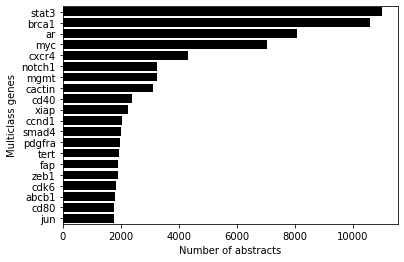

In [22]:
# which genes got the most evidence?
import seaborn as sb

to_plot = pd.DataFrame({'Multiclass genes': [gene for gene in gene_dict], 'Number of abstracts': lengths})

# removing 'nodal' gene as it is an english word, and the results are heavily skewed by abstracts mentioning nodal as a word not a gene
to_plot = to_plot[to_plot['Multiclass genes'] != 'nodal']

to_plot = to_plot.sort_values('Number of abstracts', ascending = False).iloc[0:20]

sb.barplot(data= to_plot, y= 'Multiclass genes', x = 'Number of abstracts', orient = 'h', color = 'black')

In [23]:
# looking at cancer types in these abstracts
import numpy as np
cancer_types = {"BLCA": ['bladder', 'blca'], "BRCA": ["breast", 'brca'], "COAD": ['colon', 'colorectal', 'coad'], "ESCA": ['esophageal', 'oesophageal', 'esophagus', 'oesophagus', 'esca'], "HNSC": ['head and neck', 'hnsc'], "KIRC": ['clear cell renal', 'renal clear cell', 'clear cell kidney', 'kidney clear cell', 'ccrcc', 'kirc'], "KIRP":['renal papillary', 'papillary renal', 'prcc', 'kirp'], "LIHC": ['hepatocellular', 'liver', 'lihc'], "LUAD": ['lung adenocarcinoma', 'luad'], "LUSC": ['lung squamous', 'squamous cell lung', 'lusc'], "PRAD": ['prostate', 'prad'], "THCA":['thyroid', 'thca'], "UCEC":['uterine corpus endometrial', 'endometrial', 'uterine', 'ucec']}

def is_in(ct, sentence):
    return([ct for t in cancer_types[ct] if t in sentence])

def get_tissues_for_gene(gene):
    tissues_mentioned = []

    for i in np.unique(gene_dict[gene]): # only going through each abstract once
        found_cts = []
        for rel in found_abstracts[i]['Relations']:
            found_cts.extend([is_in(ct, rel['Sentence'].lower()) for ct in cancer_types.keys()])
        tissues_mentioned.append(list(set([c for ct in found_cts for c in ct]))) # adding all tissues found in this abstract (but no duplicate mentions within this abstract)

    return(tissues_mentioned)



In [24]:

def get_weighted_counts(gene):
    ts = get_tissues_for_gene(gene)
    counts = pd.Series(0, index = ['No tissue'] + list(cancer_types.keys()), name = gene.upper())
    for t in ts:
        if t == []:
            counts.loc['No tissue'] = counts.loc['No tissue'] + 1
        else:
            weight = 1/len(t)
            for y in t:
                counts.loc[y] = counts.loc[y] + weight
    return(counts)


In [25]:
counts = []

for gene in to_plot['Multiclass genes']:
    count = get_weighted_counts(gene)
#     count = pd.Series(get_tissues_for_gene(gene), name = gene).value_counts()
    counts.append(count)
    
gene_tissue_counts = pd.concat(counts, axis = 1)

In [26]:
gene_tissue_counts

,STAT3,BRCA1,AR,MYC,CXCR4,NOTCH1,MGMT,CACTIN,CD40,XIAP,CCND1,SMAD4,PDGFRA,TERT,FAP,ZEB1,CDK6,ABCB1,CD80,JUN
No tissue,6604.000000,6328.000000,4880.000000,4334.000000,2660.000000,1978.000000,1994.000000,1881.000000,1452.000000,1411.000000,1220.000000,1237.000000,1217.000000,1187.000000,1149.000000,1153.000000,1103.000000,1085.000000,1051.000000,1051.000000
BLCA,160.183333,184.851190,128.992857,107.866667,64.676190,57.076190,69.400000,55.616667,36.700000,32.533333,31.750000,27.833333,30.750000,37.500000,39.333333,36.666667,22.833333,41.700000,32.833333,36.500000
BRCA,1840.183333,1761.201190,1396.692857,1092.107576,694.259524,508.542857,523.816667,514.683333,372.766667,361.866667,352.166667,324.950000,299.950000,319.700000,299.750000,317.833333,299.916667,309.200000,284.500000,286.750000
COAD,678.100000,628.884524,471.826190,419.907576,221.259524,202.992857,186.316667,166.683333,129.733333,116.200000,120.666667,98.450000,99.450000,134.666667,108.250000,112.000000,117.416667,95.866667,91.583333,98.416667
ESCA,135.983333,133.517857,76.316667,96.000000,61.309524,36.042857,36.533333,40.816667,33.400000,25.333333,18.000000,31.500000,20.616667,21.833333,20.166667,16.500000,24.700000,24.166667,17.833333,21.000000
HNSC,74.900000,74.941667,46.476190,42.540909,25.642857,17.666667,26.950000,28.033333,18.833333,12.500000,18.000000,8.750000,21.416667,10.033333,17.333333,4.833333,9.833333,13.333333,13.666667,12.833333
KIRC,5.083333,2.000000,1.333333,3.840909,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.200000,1.500000,2.000000,0.000000,2.500000,1.333333,0.000000,1.000000,0.000000
KIRP,0.083333,0.000000,0.000000,1.090909,0.000000,1.333333,2.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LIHC,225.183333,228.317857,170.576190,131.524242,85.892857,60.759524,60.016667,58.450000,55.100000,35.666667,34.250000,47.950000,37.450000,39.666667,40.416667,36.333333,32.533333,30.200000,39.000000,32.750000
LUAD,14.916667,26.000000,19.750000,22.124242,10.833333,8.333333,10.500000,5.333333,6.833333,4.000000,4.000000,5.500000,2.000000,3.000000,4.333333,4.000000,7.700000,2.333333,6.333333,4.000000


<Figure size 576x432 with 0 Axes>

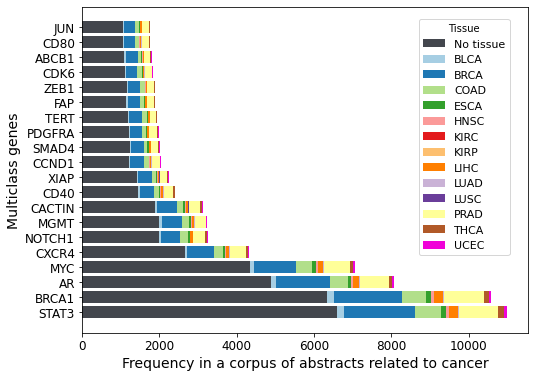

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))

import matplotlib.pyplot as plt
left = 0

gene_tissue_counts = gene_tissue_counts.fillna(0)

palette = ['#43464d'] + sb.color_palette('Paired') +  ['#f002d8']
for i in range(len(['No tissue'] + list(cancer_types.keys()))):
    ax = plt.barh(gene_tissue_counts.iloc[i].index, gene_tissue_counts.iloc[i], color = palette[i % 14], left = left, label = gene_tissue_counts.index[i])
    left = left + gene_tissue_counts.iloc[i]


leg = plt.legend(loc = 'right', bbox_to_anchor = (0.3, 0.6, 0.67, 0), title = 'Tissue', prop={'size': 11})
xlab = plt.xlabel('Frequency in a corpus of abstracts related to cancer', fontsize = 14)
ylab = plt.ylabel('Multiclass genes', fontsize = 14)
yticks = plt.yticks(fontsize = 12)
xticks = plt.xticks(fontsize = 12)

# plt.show()
plt.savefig('pangaea_most_common_genes.svg', bbox_inches = 'tight')


In [29]:
# how frequently do we find genes associated with a tissue?
(gene_tissue_counts[gene_tissue_counts.index != 'No tissue'].sum()/gene_tissue_counts.sum()).sort_values()

# between 37-40%

XIAP      0.372889
SMAD4     0.382426
CXCR4     0.383260
MGMT      0.383998
PDGFRA    0.385664
MYC       0.386293
TERT      0.389403
NOTCH1    0.390822
ZEB1      0.391235
FAP       0.394307
AR        0.395066
CD40      0.395755
CACTIN    0.396729
ABCB1     0.396887
CDK6      0.397926
STAT3     0.399473
JUN       0.401140
BRCA1     0.402455
CCND1     0.402547
CD80      0.402841
dtype: float64